In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [4]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [5]:
import seaborn as sbn

In [6]:
import matplotlib.pyplot as  plt

C:\Users\yusuf\anaconda3\envs\pppp11\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yusuf\anaconda3\envs\pppp11\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yusuf\anaconda3\envs\pppp11\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


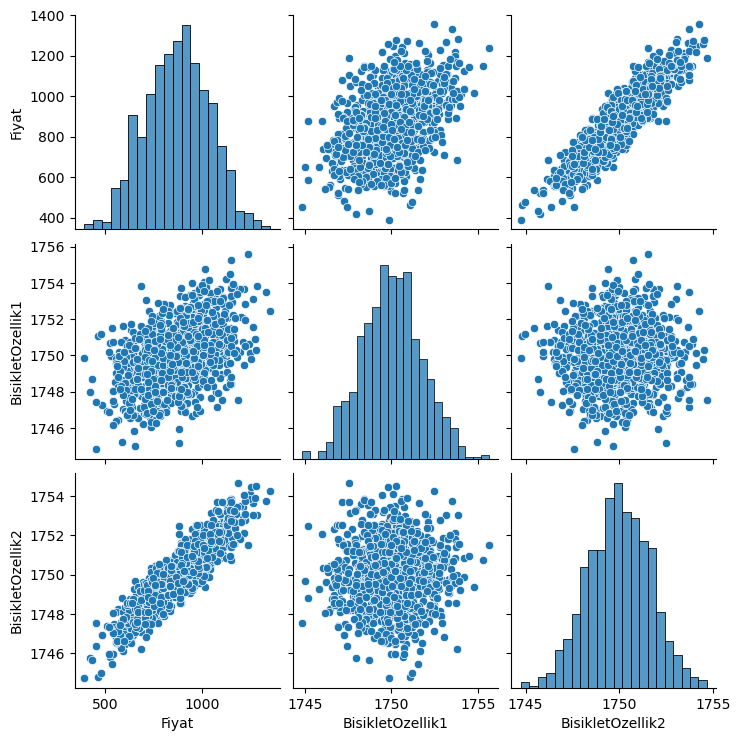

In [7]:
sbn.pairplot(dataFrame)

## Veriyi test/train olarak ikiye ayırmak

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#train_test_split

In [10]:
y = dataFrame["Fiyat"].values
# y = wx+b
# y ->label

x=dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values
# x-> feature

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=15)

In [25]:
x_train.shape ## burada olay test ve train deki değerleri atamakta 670 tanesi train içinde 330 taneside test içine atılmış durumda 

(670, 2)

In [26]:
x_test.shape

(330, 2)

In [27]:
y_train.shape

(670,)

In [28]:
y_test.shape

(330,)

In [15]:
#scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(x_train)

MinMaxScaler()

In [19]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss="mse")

In [30]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 1ms/step - loss: 795702.8750
Epoch 2/250
21/21 [==============================] - 0s 903us/step - loss: 795453.8125
Epoch 3/250
21/21 [==============================] - 0s 939us/step - loss: 795205.3750
Epoch 4/250
21/21 [==============================] - 0s 870us/step - loss: 794933.0625
Epoch 5/250
21/21 [==============================] - 0s 969us/step - loss: 794632.0625
Epoch 6/250
21/21 [==============================] - 0s 947us/step - loss: 794302.5625
Epoch 7/250
21/21 [==============================] - 0s 923us/step - loss: 793935.3125
Epoch 8/250
21/21 [==============================] - 0s 944us/step - loss: 793532.0625
Epoch 9/250
21/21 [==============================] - 0s 966us/step - loss: 793083.6250
Epoch 10/250
21/21 [==============================] - 0s 954us/step - loss: 792594.8125
Epoch 11/250
21/21 [==============================] - 0s 944us/step - loss: 792059.4375
Epoch 12/250
21/21 [=======================

In [36]:
loss =model.history.history["loss"]

C:\Users\yusuf\anaconda3\envs\pppp11\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yusuf\anaconda3\envs\pppp11\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

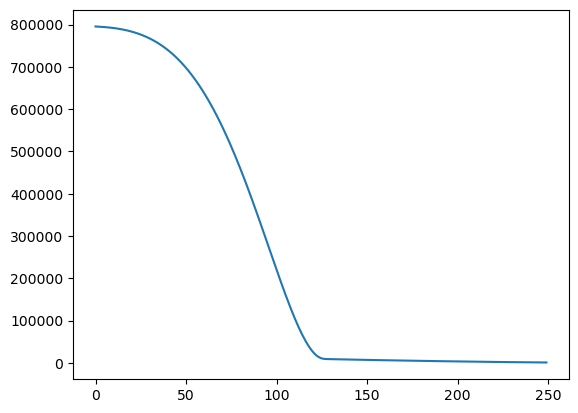

In [37]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [40]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [41]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [42]:
trainLoss

804.2073974609375

In [43]:
testLoss

785.71630859375

In [71]:
testTahminen = model.predict(x_test)

11/11 [==============================] - 0s 874us/step


In [73]:
testTahminen

array([[1051.419  ],
       [ 672.5573 ],
       [ 884.4523 ],
       [ 888.486  ],
       [ 891.0529 ],
       [ 510.48715],
       [ 926.49146],
       [ 975.0937 ],
       [ 945.0342 ],
       [ 999.25946],
       [ 779.8347 ],
       [ 924.4668 ],
       [ 934.71063],
       [1033.7139 ],
       [1096.2347 ],
       [ 716.1764 ],
       [1084.1389 ],
       [ 682.16345],
       [1105.8212 ],
       [ 892.68744],
       [ 895.67114],
       [ 755.9226 ],
       [ 539.73914],
       [ 650.18304],
       [ 852.14886],
       [1066.6262 ],
       [ 743.106  ],
       [ 778.7735 ],
       [ 874.2297 ],
       [ 790.9024 ],
       [ 520.7158 ],
       [ 808.38715],
       [ 756.7291 ],
       [ 684.77295],
       [ 888.54047],
       [ 853.20764],
       [1017.8362 ],
       [ 998.22675],
       [ 858.6186 ],
       [ 866.8378 ],
       [ 783.46747],
       [1126.775  ],
       [1067.7782 ],
       [1061.0479 ],
       [ 889.148  ],
       [ 648.2211 ],
       [1096.9977 ],
       [ 957.

In [74]:
tahminDfsi = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [75]:
tahminDfsi

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [76]:
testTahminen = pd.Series(testTahminen.reshape(330,))

In [77]:
testTahminen

0      1051.418945
1       672.557312
2       884.452271
3       888.486023
4       891.052917
          ...     
325     999.671326
326     804.171082
327     793.512695
328    1129.612183
329     810.759094
Length: 330, dtype: float32

In [78]:
tahminDfsi = pd.concat([tahminDfsi,testTahminen],axis=1)

In [79]:
tahminDfsi

,Gerçek Y,0
0,1081.652164,1051.418945
1,622.675990,672.557312
2,889.356810,884.452271
3,902.826733,888.486023
4,897.662404,891.052917
...,...,...
325,1028.438035,999.671326
326,789.934950,804.171082
327,758.490486,793.512695
328,1172.871659,1129.612183


In [80]:
tahminDfsi.columns = ["Gerçek Y", "Tahmin Y"]

In [81]:
tahminDfsi

,Gerçek Y,Tahmin Y
0,1081.652164,1051.418945
1,622.675990,672.557312
2,889.356810,884.452271
3,902.826733,888.486023
4,897.662404,891.052917
...,...,...
325,1028.438035,999.671326
326,789.934950,804.171082
327,758.490486,793.512695
328,1172.871659,1129.612183


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

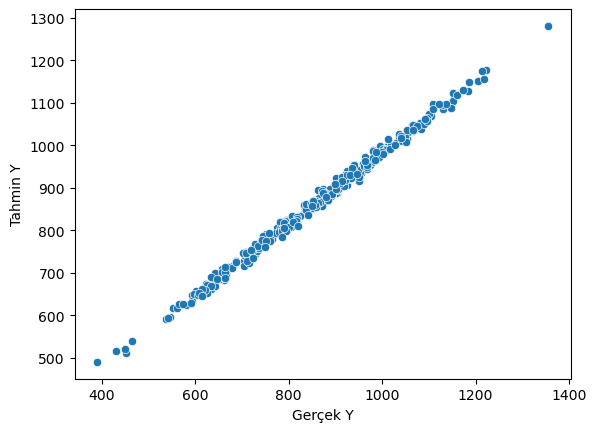

In [82]:
sbn.scatterplot(x = "Gerçek Y", y="Tahmin Y", data= tahminDfsi)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
mean_absolute_error(tahminDfsi["Gerçek Y"],tahminDfsi["Tahmin Y"])## hata payını söylüyor

22.21775519820431

In [85]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [86]:
yeniBisikletOzellikleri = [[1760,1758],]

In [87]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [88]:
yeniBisikletOzellikleri

array([[1.4133144 , 1.34470668]])

In [89]:
model.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 15ms/step


array([[1834.1934]], dtype=float32)

In [90]:
from tensorflow.keras.models import load_model

In [91]:
model.save("bisiklet_modeli.h5")

In [92]:
sonradanCagirilanModel= load_model("bisiklet_modeli.h5")

In [93]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 47ms/step


array([[1834.1934]], dtype=float32)